### Name: Akanksha Mathpati 

#### Data Cleaning

In [1]:
!pip install --upgrade numpy

  Using cached numpy-2.2.6-cp312-cp312-macosx_14_0_arm64.whl.metadata (62 kB)
Using cached numpy-2.2.6-cp312-cp312-macosx_14_0_arm64.whl (5.1 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.4.2 which is incompatible.
contourpy 1.2.0 requires numpy<2.0,>=1.20, but you have numpy 2.2.6 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.6 which is incompatible.
tensorflow 2.19.0 requires numpy<2.2.0,>=1.26.0, but you have numpy 2.2.6 which is incompatible.
streamlit 1.32.0 requires numpy<2,>=1.19.3, but you have numpy 2.2.6 which is incompatible.
streamlit 1.32.0 requires protobuf<5,>=3.20, but you have protob

In [2]:
!pip uninstall -y numpy
!pip install "numpy<2.0"

Found existing installation: numpy 2.2.6
Uninstalling numpy-2.2.6:
  Successfully uninstalled numpy-2.2.6
  Using cached numpy-1.26.4-cp312-cp312-macosx_11_0_arm64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp312-cp312-macosx_11_0_arm64.whl (13.7 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.4.2 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
streamlit 1.32.0 requires protobuf<5,>=3.20, but you have protobuf 5.29.4 which is incompatible.
streamlit 1.32.0 requires rich<14,>=10.14.0, but you have rich 14.0.0 which is incompatible.


In [3]:
import numpy as np
import pandas as pd
print(np.__version__)
print(pd.__version__)


1.26.4
2.2.2


In [3]:
import pandas as pd
df = pd.read_parquet('https://storage.googleapis.com/msca-bdp-data-open/news_final_project/news_final_project.parquet', engine='pyarrow')
df.shape

(200083, 5)

In [3]:
df.head(10)

,url,date,language,title,text
0,http://businessnewsthisweek.com/business/infog...,2023-05-20,en,Infogain AI Business Solutions Now Available i...,\n\nInfogain AI Business Solutions Now Availab...
1,https://allafrica.com/stories/202504250184.html,2025-04-25,en,Africa: AI Policies in Africa - Lessons From G...,\nAfrica: AI Policies in Africa - Lessons From...
2,https://asiatimes.com/2023/07/yang-lan-intervi...,2023-07-25,en,Yang Lan interviews academics on AI developmen...,\nYang Lan interviews academics on AI developm...
3,https://cdn.meritalk.com/articles/commerce-nom...,2025-02-04,en,Commerce Nominee Promises Increased Domestic A...,\nCommerce Nominee Promises Increased Domestic...
4,https://citylife.capetown/hmn/uncategorized/re...,2023-11-11,en,Revolutionizing the Manufacturing Industry: Th...,Revolutionizing the Manufacturing Industry:...
5,https://citylife.capetown/iw/uncategorized/cou...,2023-12-10,en,האם AI ובן אדם יכולים להתאהב?,האם AI ובן אדם יכולים להתאהב? \n \n\nעבור...
6,https://citylife.capetown/uncategorized/ai-cha...,2023-08-02,en,The Challenge of Falsehoods in AI Chatbots,\n\nThe Challenge of Falsehoods in AI Chatbots...
7,https://digitalmediawire.com/2024/10/08/meta-d...,2024-10-09,en,Meta Debuts New Generative AI Tools For Video-...,\n\nMeta Debuts New Generative AI Tools For V...
8,https://drinksretailingnews.co.uk/news/fullsto...,2023-03-30,en,Can AI benefit drinks retailers? - Drinks Reta...,\n\n \nCan AI benefit drinks retailers...
9,https://earthnewspaper.substack.com/p/january-...,2025-01-29,en,"January 29, 2025, 25 Posts Published And Archi...","\n\nJanuary 29, 2025, 25 Posts Published And A..."


In [4]:
print(df.columns)

Index(['url', 'date', 'language', 'title', 'text'], dtype='object')


In [5]:
df = df[df['text'].notnull() & df['text'].str.strip().ne('')]

In [6]:
print(df.shape)

(200083, 5)


In [9]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [7]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/akankshamathpati/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/akankshamathpati/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [14]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/akankshamathpati/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
 import nltk
 nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/akankshamathpati/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

In [20]:
import re
from langdetect import detect, LangDetectException
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from tqdm.auto import tqdm

# Initialize NLP utilities
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def is_english(text):
    try:
        return detect(text) == 'en'
    except LangDetectException:
        return False

def tokenize_lemmatize(text):
    # Tokenize → filter → lemmatize
    tokens = word_tokenize(text.lower())
    return [
        lemmatizer.lemmatize(tok)
        for tok in tokens
        if tok.isalpha() and tok not in stop_words
    ]

def clean_text(text):
    # basic whitespace and URL cleanup
    text = re.sub(r'\n+', ' ', text)
    text = re.sub(r'\\n+', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'http\S+|www\S+', '', text)
    # strip image metadata tokens and dimension specs
    text = re.sub(r"\b(px|jpeg|jpg|png|rawpixel|editorial|image|photo|stock)\b", "", text)
    text = re.sub(r"\b\d{2,4}x\d{2,4}\b", "", text)
    text = re.sub(r'<.*?>', '', text)
    # → convert to lowercase *before* stripping non-letters
    text = text.lower()
    # keep only a–z and spaces
    text = re.sub(r'[^a-z\s]', '', text)
    return text.strip()

def full_cleaning_pipeline(df):
    df = df.copy()
    df.dropna(subset=['text'], inplace=True)
    df = df[df['text'].str.strip().astype(bool)]
    df.drop_duplicates(subset=['text'], inplace=True)

    # Clean and filter by length
    tqdm.pandas()
    df['cleaned_text'] = df['text'].progress_apply(clean_text)
    df = df[df['cleaned_text'].str.len() > 100]

    # Language filtering
    tqdm.pandas()
    df['is_english'] = df['cleaned_text'].progress_apply(is_english)
    df = df[df['is_english']].drop(columns=['is_english'])

    # Tokenize, remove stopwords, lemmatize
    tqdm.pandas()
    df['tokens'] = df['cleaned_text'].progress_apply(tokenize_lemmatize)

    return df


In [22]:
from tqdm import tqdm
tqdm.pandas()

In [24]:
pip install langdetect

Note: you may need to restart the kernel to use updated packages.


In [26]:
import pandas as pd
import re
from langdetect import detect
from langdetect.lang_detect_exception import LangDetectException
from tqdm import tqdm

In [28]:
df_cleaned = full_cleaning_pipeline(df)

100%|██████████| 198737/198737 [08:58<00:00, 368.76it/s]


In [30]:
print(df_cleaned.shape)

(198737, 7)


In [32]:
df_cleaned.head()

,url,date,language,title,text,cleaned_text,tokens
0,http://businessnewsthisweek.com/business/infog...,2023-05-20,en,Infogain AI Business Solutions Now Available i...,\n\nInfogain AI Business Solutions Now Availab...,infogain ai business solutions now available i...,"[infogain, ai, business, solution, available, ..."
1,https://allafrica.com/stories/202504250184.html,2025-04-25,en,Africa: AI Policies in Africa - Lessons From G...,\nAfrica: AI Policies in Africa - Lessons From...,africa ai policies in africa lessons from gha...,"[africa, ai, policy, africa, lesson, ghana, rw..."
2,https://asiatimes.com/2023/07/yang-lan-intervi...,2023-07-25,en,Yang Lan interviews academics on AI developmen...,\nYang Lan interviews academics on AI developm...,yang lan interviews academics on ai developmen...,"[yang, lan, interview, academic, ai, developme..."
3,https://cdn.meritalk.com/articles/commerce-nom...,2025-02-04,en,Commerce Nominee Promises Increased Domestic A...,\nCommerce Nominee Promises Increased Domestic...,commerce nominee promises increased domestic a...,"[commerce, nominee, promise, increased, domest..."
4,https://citylife.capetown/hmn/uncategorized/re...,2023-11-11,en,Revolutionizing the Manufacturing Industry: Th...,Revolutionizing the Manufacturing Industry:...,revolutionizing the manufacturing industry the...,"[revolutionizing, manufacturing, industry, imp..."


### Filtering the irrelevant text

In [35]:
df_cleaned = df_cleaned[df_cleaned['tokens'].apply(len) >= 35]

In [37]:
print(df_cleaned.shape)

(198465, 7)


In [39]:
ai_keywords = [
    'artificial intelligence',
    'machine learning',
    'deep learning',
    'neural network',
    'natural language processing',
    'computer vision',
    'generative ai',
    'chatgpt',
    'openai',
    'transformer model',
    'automation',
    'llm',
    'bert',
    'robotic process automation'
]


In [41]:
# Step 1: Compile a regex pattern for efficiency
pattern = r'\b(' + '|'.join([re.escape(k.lower()) for k in ai_keywords]) + r')\b'
compiled_pattern = re.compile(pattern)

# Step 2: Create df_relevant by filtering df_cleaned
df_relevant = df_cleaned[df_cleaned['cleaned_text'].astype(str).str.lower().apply(lambda x: bool(compiled_pattern.search(x)))]

# Optional: View how many articles were retained
print(f"Relevant articles retained: {len(df_relevant)} out of {len(df_cleaned)}")

Relevant articles retained: 157506 out of 198465


In [43]:
print(df_relevant.shape)

(157506, 7)


In [45]:
df_relevant

,url,date,language,title,text,cleaned_text,tokens
0,http://businessnewsthisweek.com/business/infog...,2023-05-20,en,Infogain AI Business Solutions Now Available i...,\n\nInfogain AI Business Solutions Now Availab...,infogain ai business solutions now available i...,"[infogain, ai, business, solution, available, ..."
1,https://allafrica.com/stories/202504250184.html,2025-04-25,en,Africa: AI Policies in Africa - Lessons From G...,\nAfrica: AI Policies in Africa - Lessons From...,africa ai policies in africa lessons from gha...,"[africa, ai, policy, africa, lesson, ghana, rw..."
2,https://asiatimes.com/2023/07/yang-lan-intervi...,2023-07-25,en,Yang Lan interviews academics on AI developmen...,\nYang Lan interviews academics on AI developm...,yang lan interviews academics on ai developmen...,"[yang, lan, interview, academic, ai, developme..."
3,https://cdn.meritalk.com/articles/commerce-nom...,2025-02-04,en,Commerce Nominee Promises Increased Domestic A...,\nCommerce Nominee Promises Increased Domestic...,commerce nominee promises increased domestic a...,"[commerce, nominee, promise, increased, domest..."
4,https://citylife.capetown/hmn/uncategorized/re...,2023-11-11,en,Revolutionizing the Manufacturing Industry: Th...,Revolutionizing the Manufacturing Industry:...,revolutionizing the manufacturing industry the...,"[revolutionizing, manufacturing, industry, imp..."
...,...,...,...,...,...,...,...
200076,https://www.wndu.com/prnewswire/2023/11/15/woo...,2023-11-15,en,Woolpert and Allvision Forge Strategic Agreeme...,Woolpert and Allvision Forge Strategic Agreeme...,woolpert and allvision forge strategic agreeme...,"[woolpert, allvision, forge, strategic, agreem..."
200077,https://www.wusf.org/2024-05-17/openais-new-ch...,2024-05-17,en,OpenAI's new ChatGPT talks and sings. But how ...,\nOpenAI's new ChatGPT talks and sings. But ho...,openais new chatgpt talks and sings but how hu...,"[openais, new, chatgpt, talk, sings, human, wu..."
200078,https://www.wuwf.org/2024-06-03/all-eyes-on-ra...,2024-06-03,en,‘All eyes on Rafah’ is the Internet's most vir...,\n‘All eyes on Rafah’ is the Internet's most v...,all eyes on rafah is the internets most viral ...,"[eye, rafah, internet, viral, ai, two, artist,..."
200079,https://www.zawya.com/en/press-release/compani...,2024-04-15,en,SentinelOne to spotlight Purple AI at GISEC 2024,SentinelOne to spotlight Purple AI at GISEC 20...,sentinelone to spotlight purple ai at gisec go...,"[sentinelone, spotlight, purple, ai, gisec, go..."


In [47]:
df_relevant.to_csv('ai_articles.csv', index=False)

### Lets see the data reduction metrics 

In [13]:
import re
from langdetect import detect, LangDetectException
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from tqdm.auto import tqdm

# ——— Helpers ———
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def is_english(text):
    try:
        return detect(text) == 'en'
    except LangDetectException:
        return False

def tokenize_lemmatize(text):
    tokens = word_tokenize(text.lower())
    return [
        lemmatizer.lemmatize(tok)
        for tok in tokens
        if tok.isalpha() and tok not in stop_words
    ]

def clean_text(text):
    text = re.sub(r'\n+', ' ', text)
    text = re.sub(r'\\n+', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'http\S+|www\S+', '', text)
    text = re.sub(r"\b(px|jpeg|jpg|png|rawpixel|editorial|image|photo|stock)\b", "", text)
    text = re.sub(r"\b\d{2,4}x\d{2,4}\b", "", text)
    text = re.sub(r'<.*?>', '', text)
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    return text.strip()

def full_cleaning_pipeline_with_stats(df):
    df = df.copy()
    initial = df.shape[0]
    print(f"Initial rows: {initial}")

    # 1) Drop NA in 'text'
    df = df.dropna(subset=['text'])
    after1 = df.shape[0]
    print(f" After dropna(text): {after1} rows  →  {(initial-after1)/initial*100:.2f}% removed")

    # 2) Drop blank/whitespace-only
    df = df[df['text'].str.strip().astype(bool)]
    after2 = df.shape[0]
    print(f" After strip empty: {after2} rows  →  {(after1-after2)/after1*100:.2f}% removed")

    # 3) Drop duplicates
    df = df.drop_duplicates(subset=['text'])
    after3 = df.shape[0]
    print(f" After drop_duplicates: {after3} rows  →  {(after2-after3)/after2*100:.2f}% removed")

    # 4) Clean & length filter
    tqdm.pandas(desc=" Cleaning text ")
    df['cleaned_text'] = df['text'].progress_apply(clean_text)
    before4 = df.shape[0]
    df = df[df['cleaned_text'].str.len() > 100]
    after4 = df.shape[0]
    print(f" After clean+len>100: {after4} rows  →  {(before4-after4)/before4*100:.2f}% removed")

    # 5) Language filter
    tqdm.pandas(desc=" Detecting English ")
    df['is_english'] = df['cleaned_text'].progress_apply(is_english)
    before5 = df.shape[0]
    df = df[df['is_english']].drop(columns=['is_english'])
    after5 = df.shape[0]
    print(f" After English filter: {after5} rows  →  {(before5-after5)/before5*100:.2f}% removed")

    # 6) Tokenize & lemmatize (no rows dropped here)
    tqdm.pandas(desc=" Tokenizing ")
    df['tokens'] = df['cleaned_text'].progress_apply(tokenize_lemmatize)

    return df

# ——— Run it on your DataFrame named `df` ———
cleaned_df = full_cleaning_pipeline_with_stats(df)
print(f"\nFinal cleaned DF has {cleaned_df.shape[0]} rows.")


Initial rows: 200083
 After dropna(text): 200083 rows  →  0.00% removed
 After strip empty: 200083 rows  →  0.00% removed
 After drop_duplicates: 199536 rows  →  0.27% removed


 Cleaning text :   0%|          | 0/199536 [00:00<?, ?it/s]

 After clean+len>100: 198912 rows  →  0.31% removed


 Detecting English :   0%|          | 0/198912 [00:00<?, ?it/s]

 After English filter: 198743 rows  →  0.08% removed


 Tokenizing :   0%|          | 0/198743 [00:00<?, ?it/s]


Final cleaned DF has 198743 rows.


In [17]:
# your recorded row‐counts at each stage
steps = {
    "Initial":                   200083,
    "After dropping duplicates": 198743,
    "After English filter":      198737,
    "After token>=35 filter":    198465,
    "After removing irrelevant": 157506,
}

prev_count = None
for step, count in steps.items():
    if prev_count is None:
        print(f"{step:30s}: {count:,d} rows")
    else:
        red_pct = (prev_count - count) / prev_count * 100
        print(f"{step:30s}: {count:,d} rows  →  {red_pct:.2f}% reduction from previous step")
    prev_count = count

# total reduction from Initial → Final
initial = steps["Initial"]
final   = steps["After removing irrelevant"]
total_red = (initial - final) / initial * 100
print(f"\nTotal reduction: {initial:,d} → {final:,d} rows  →  {total_red:.2f}% overall reduction")


Initial                       : 200,083 rows
After dropping duplicates     : 198,743 rows  →  0.67% reduction from previous step
After English filter          : 198,737 rows  →  0.00% reduction from previous step
After token>=35 filter        : 198,465 rows  →  0.14% reduction from previous step
After removing irrelevant     : 157,506 rows  →  20.64% reduction from previous step

Total reduction: 200,083 → 157,506 rows  →  21.28% overall reduction


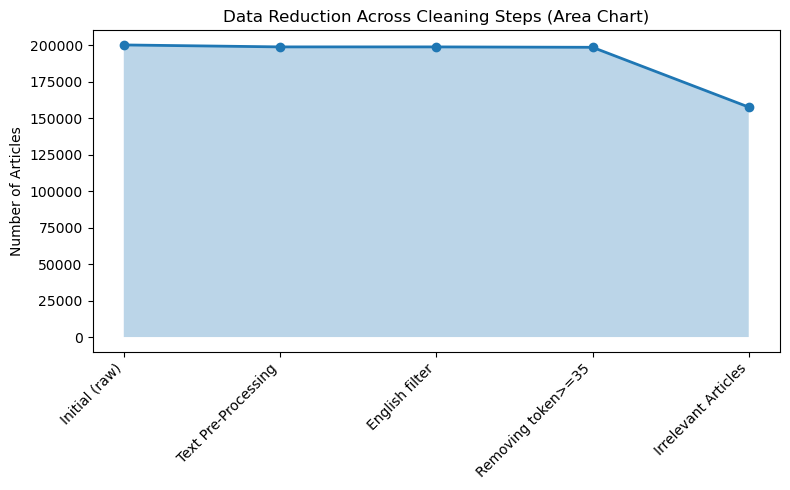

In [23]:
import matplotlib.pyplot as plt

# Define cleaning steps and counts
steps = [
    "Initial (raw)",
    "Text Pre-Processing",
    "English filter",
    "Removing token>=35",
    "Irrelevant Articles"
]
counts = [200083, 198743, 198737, 198465, 157506]

x = list(range(len(counts)))

plt.figure(figsize=(8, 5))
plt.plot(x, counts, marker='o', linewidth=2)
plt.fill_between(x, counts, alpha=0.3)
plt.xticks(x, steps, rotation=45, ha="right")
plt.ylabel("Number of Articles")
plt.title("Data Reduction Across Cleaning Steps (Area Chart)")
plt.tight_layout()
plt.show()
